In [ ]:
# تثبيت المكتبات الضرورية
!pip install numpy scipy matplotlib pandas scikit-learn

In [ ]:
# استيراد المكتبات اللازمة
import numpy as np

# إنشاء مصفوفتين كمثال
A = np.array([[2, 1],
              [1, 3]])

B = np.array([[1, 2],
              [3, 4]])

# ضرب المصفوفتين
C = np.dot(A, B)

print("ناتج ضرب المصفوفة A في B هو:\n", C)

# حساب القيم الذاتية والمتجهات الذاتية للمصفوفة A
eigenvalues, eigenvectors = np.linalg.eig(A)

print("\nالقيم الذاتية للمصفوفة A هي:\n", eigenvalues)
print("\nالمتجهات الذاتية للمصفوفة A هي:\n", eigenvectors)


ناتج ضرب المصفوفة A في B هو:
 [[ 5  8]
 [10 14]]

القيم الذاتية للمصفوفة A هي:
 [1.38196601 3.61803399]

المتجهات الذاتية للمصفوفة A هي:
 [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [ ]:
# 1) توليد بيانات صناعية ثنائية الأبعاد لتصنيف ثنائي
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# توليد بيانات: ميزتان (feature1, feature2) وفئتان (0,1)
X, y = make_classification(n_samples=600, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, class_sep=1.5, flip_y=0.02, random_state=42)

# تقسيم Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 2) تدريب Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 3) التنبؤ والتقييم
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=3)

print("Accuracy:", acc)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)


Accuracy: 0.96

Confusion Matrix:
 [[71  4]
 [ 2 73]]

Classification Report:
               precision    recall  f1-score   support

           0      0.973     0.947     0.959        75
           1      0.948     0.973     0.961        75

    accuracy                          0.960       150
   macro avg      0.960     0.960     0.960       150
weighted avg      0.960     0.960     0.960       150



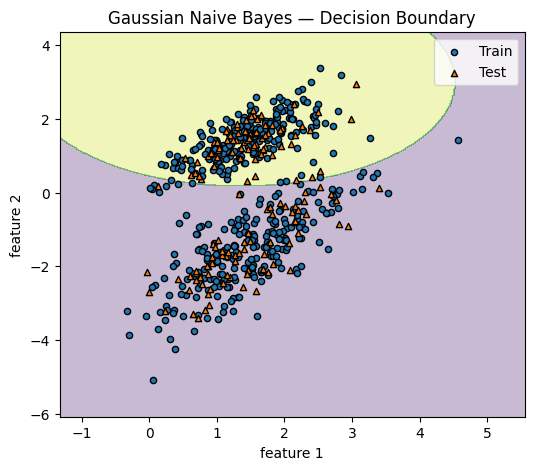

In [ ]:
import matplotlib.pyplot as plt

# شبكة نقاط لرسم حدود القرار
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6,5))
# خريطة حدود القرار
plt.contourf(xx, yy, Z, alpha=0.3)
# نقاط التدريب/الاختبار
plt.scatter(X_train[:,0], X_train[:,1], s=20, label="Train", edgecolor='k')
plt.scatter(X_test[:,0],  X_test[:,1],  s=20, label="Test",  marker='^', edgecolor='k')
plt.title("Gaussian Naive Bayes — Decision Boundary")
plt.legend()
plt.xlabel("feature 1"); plt.ylabel("feature 2")
plt.show()


In [ ]:
def run_gaussian_nb(class_sep=1.5, flip_y=0.02, random_state=42):
    X_, y_ = make_classification(n_samples=600, n_features=2, n_redundant=0, n_informative=2,
                                 n_clusters_per_class=1, class_sep=class_sep, flip_y=flip_y,
                                 random_state=random_state)
    Xtr, Xte, ytr, yte = train_test_split(X_, y_, test_size=0.25, random_state=42, stratify=y_)
    model = GaussianNB().fit(Xtr, ytr)
    yhat = model.predict(Xte)
    acc = accuracy_score(yte, yhat)
    return acc

for sep in [2.0, 1.5, 1.0, 0.7]:
    acc = run_gaussian_nb(class_sep=sep, flip_y=0.02)
    print(f"class_sep={sep}: accuracy={acc:.3f}")

for noise in [0.00, 0.02, 0.05, 0.10]:
    acc = run_gaussian_nb(class_sep=1.5, flip_y=noise)
    print(f"flip_y={noise}: accuracy={acc:.3f}")


class_sep=2.0: accuracy=0.987
class_sep=1.5: accuracy=0.960
class_sep=1.0: accuracy=0.867
class_sep=0.7: accuracy=0.820
flip_y=0.0: accuracy=0.953
flip_y=0.02: accuracy=0.960
flip_y=0.05: accuracy=0.953
flip_y=0.1: accuracy=0.913


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
import numpy as np

# توليد بيانات جديدة لعرض الفكرة
X, y = make_classification(n_samples=800, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           class_sep=1.5, random_state=42)

# تهيئة المصنف
gnb = GaussianNB()

# تطبيق التحقق المتقاطع مع 5 طيات (K=5)
scores = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')

print("دقة كل طيّة:", scores)
print("متوسط الدقة:", scores.mean())
print("الانحراف المعياري:", scores.std())


دقة كل طيّة: [0.9375  0.95625 0.94375 0.9625  0.90625]
متوسط الدقة: 0.9412499999999999
الانحراف المعياري: 0.019605483926697663


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import numpy as np

# بيانات تجريبية
X, y = make_classification(n_samples=800, n_features=10, n_informative=6,
                           n_redundant=0, class_sep=1.2, random_state=42)

# شبكة البحث
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'max_iter': [1000]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf = GridSearchCV(LogisticRegression(), param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
clf.fit(X, y)

print("أفضل إعدادات:", clf.best_params_)
print("أفضل دقة CV:", round(clf.best_score_, 4))


أفضل إعدادات: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
أفضل دقة CV: 0.83


In [ ]:
import numpy as np
from scipy.stats import entropy
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler

# توزيعات تجريبية
p = np.array([0.6, 0.3, 0.1]) + 1e-12
q = np.array([0.5, 0.4, 0.1]) + 1e-12
p, q = p/p.sum(), q/q.sum()

H_p   = entropy(p, base=2)           # Entropy
KL_pq = entropy(p, qk=q, base=2)     # KL(p||q)

print("Entropy H(p):", round(H_p, 4))
print("KL Divergence KL(p||q):", round(KL_pq, 4))

# MI لاختيار الميزات
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=600, n_features=8, n_informative=4, random_state=42)
X = StandardScaler().fit_transform(X)
mi = mutual_info_classif(X, y, random_state=42)
print("Mutual Information لكل ميزة:\n", np.round(mi, 4))


Entropy H(p): 1.2955
KL Divergence KL(p||q): 0.0333
Mutual Information لكل ميزة:
 [0.0079 0.1195 0.1714 0.0524 0.1691 0.0221 0.1181 0.    ]


In [ ]:
# 1) تحميل/توليد البيانات
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=12, n_informative=6, random_state=42)

# 2) تقسيم وتهيئة
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

# 3) نموذج أساس (Baseline)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
base = GaussianNB().fit(X_train, y_train)
y_pred = base.predict(X_test)
print("Baseline Accuracy:", round(accuracy_score(y_test, y_pred), 4))

# 4) تحسين تدريجي (LogisticRegression + GridSearch)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
param_grid = {'C':[0.01,0.1,1,10,100], 'solver':['lbfgs','liblinear'], 'penalty':['l2'], 'max_iter':[1000]}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(LogisticRegression(), param_grid, cv=cv, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)

best = gs.best_estimator_
y_pred_best = best.predict(X_test)
print("Best Params:", gs.best_params_)
print("Improved Accuracy:", round(accuracy_score(y_test, y_pred_best), 4))
print("\nReport:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Baseline Accuracy: 0.825
Best Params: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Improved Accuracy: 0.825

Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       100
           1       0.81      0.85      0.83       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200

Confusion Matrix:
 [[80 20]
 [15 85]]
